#Importing Libraries

In [ ]:
# Sequential API to create models
from keras.models import Sequential

# Components to create a model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten

# Stochastic Gradient Descent Algorithm
from keras.optimizers import SGD

# Keras already hosted MNIST dataset for us
from keras.datasets import mnist

# A Keras utility to binarize integers
from keras.utils import to_categorical

# A Keras utility to visualize model graph
from keras.utils import plot_model

# Another ML library that has many utilities for image operation
import skimage

# Here we will use only two of its utilities
from skimage.io import imshow

# Another python library for plotting things
import matplotlib.pyplot as plt

# Another python library to manipulate vectors, matrices, arrays etc.
import numpy as np

#Hyperparameters Parameters

In [ ]:
# Whole dataset splits into batches
batch_size = 128
# Number of labels of our dataset
num_classes = 10
# Number of times we want to train the model
nb_epoch = 10

#Load Data

In [ ]:
# Load MNIST dataset
# Data split into two sub-set: Training and Test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#Data Statistics

In [ ]:
print("Number of Training Samples:", len(X_train))
print("Number of Associated Labels:", len(y_train))

Number of Training Samples: 60000
Number of Associated Labels: 60000


In [ ]:
# Print the shape of the training data
print("Shape of Training Data:", X_train.shape)

Shape of Training Data: (60000, 28, 28)


In [ ]:
# Print the data type of training samples
print("Data Type of Training Samples:", X_train.dtype)

Data Type of Training Samples: uint8


In [ ]:
# Print the number of test samples and associated labels
print("Number of Test Samples: ", len(X_test))
print("Number of Associated Labels: ", len(y_test))

Number of Test Samples:  10000
Number of Associated Labels:  10000


In [ ]:
# Print the shape of training labels
print("Shape of Training Labels: ", y_train.shape)

Shape of Training Labels:  (60000,)


In [ ]:
# Print the shape of test data
print("Shape of Test Data: ", X_test.shape)

Shape of Test Data:  (10000, 28, 28)


In [ ]:
# Print the data type of test samples
print("Data Type of Test Samples: ", X_test.dtype)

Data Type of Test Samples:  uint8


In [ ]:
# Print the shape of test labels
print("Shape of Test Labels: ", y_test.shape)

Shape of Test Labels:  (10000,)


#Visualize Data

In [ ]:
# Displaying the shape of a single sample among 60,000 samples
print(X_train[0].shape)

(28, 28)


In [ ]:
# Getting a random sample from X_train
a_random_sample = X_train[0]
# Displaying the pixel values of the sample
print(a_random_sample)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

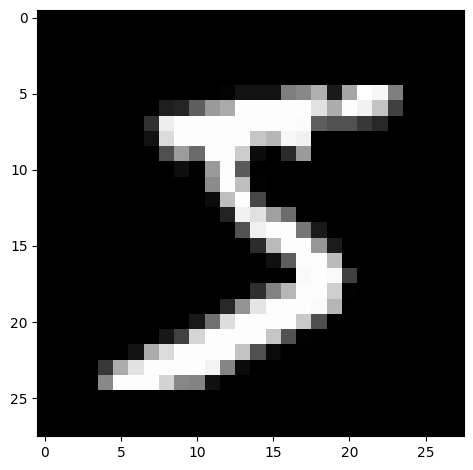

In [ ]:
# Getting a random sample and displaying it
random_image = X_train[0]
imshow(random_image)

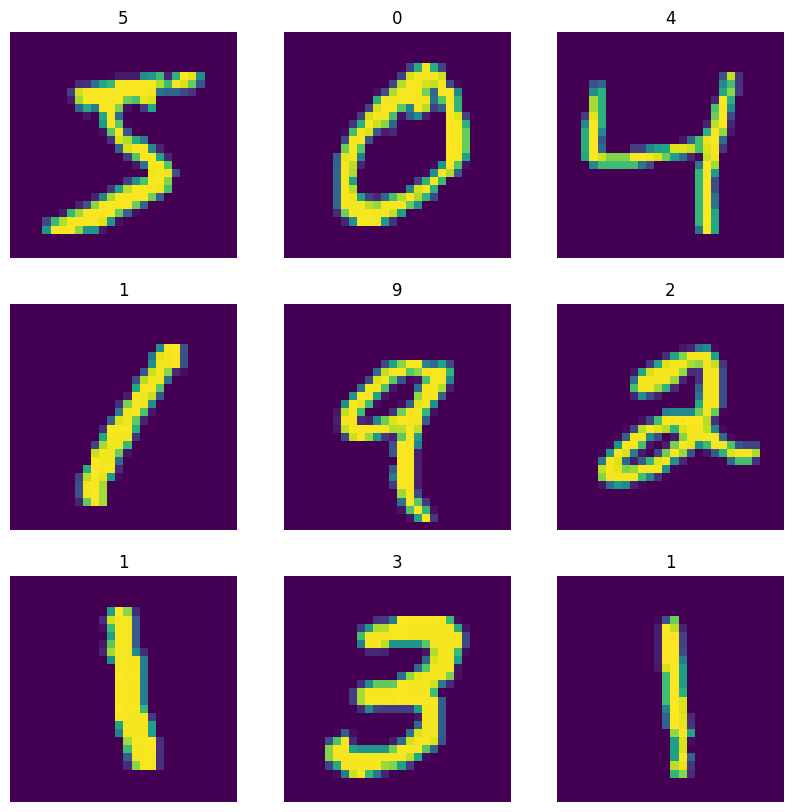

In [ ]:
# Displaying a grid of 9 random samples from the training data
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # Get a sample at index i
    an_image = X_train[i]
    # Display the sample
    plt.imshow(an_image)
    # Display the label of the sample as title
    plt.title(int(y_train[i]))
    plt.axis("off")
plt.show()

#Change data Type of Train and Test data

In [ ]:
# Print previous data type of Train and Test samples
print("Previous DataType of Train and Test samples:")
print(X_train.dtype)
print(X_test.dtype)

# Change data type of Train and Test data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Print new data type of Train and Test samples
print("New DataType of Train and Test samples:")
print(X_train.dtype)
print(X_test.dtype)

Previous DataType of Train and Test samples:
uint8
uint8
New DataType of Train and Test samples:
float32
float32


#Rescaling Data

In [ ]:
# Get a random sample
a_sample = X_train[0]
print("Min value of sample: ", a_sample.min())
print("Max value of sample: ", a_sample.max())

Min value of sample:  0.0
Max value of sample:  255.0


In [ ]:
# Divide each value in Train and Test data by 255
X_train /= 255.0
X_test /= 255.0

In [ ]:
# Get a sample
a_sample = X_train[0]
print("Min value of sample:", a_sample.min())
print("Max value of sample:", a_sample.max())

Min value of sample: 0.0
Max value of sample: 1.0


#Reshape Train and Test data to 4D

In [ ]:
# Make sure images have shape (28, 28, 1)
# We want to expand a dim at the end
X_train = np.expand_dims(X_train, -1)
# We want to expand a dim at the end
X_test = np.expand_dims(X_test, -1)
# Get new shape of Train and Test
print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


#Binarize Labels

In [ ]:
# Display the training labels
print("Training Labels:", y_train)

Training Labels: [5 0 4 ... 5 6 8]


In [ ]:
# Shape of training labels
print("Shape of training labels:", y_train.shape)

Shape of training labels: (60000,)


In [ ]:
# A random array
input_array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(input_array)
print("Input list shape:", input_array.shape)

# Apply to_categorical to the random array
output = to_categorical(input_array, num_classes=10)
print(output)
print("Input list shape:", input_array.shape)

[0 1 2 3 4 5 6 7 8 9]
Input list shape: (10,)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Input list shape: (10,)


In [ ]:
# Apply to_categorical to train labels
Y_train = to_categorical(y_train, num_classes)

# Apply to_categorical to test labels
Y_test = to_categorical(y_test, num_classes)

#Define Model

In [ ]:
# Define an input shape for our CNN
input_shape = (28, 28, 1)

In [ ]:
# Keras provides the Sequential API to create models
model = Sequential()

# Define the Input Layer
model.add(Input(shape=input_shape))

# 1st Conv layer
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))

# 1st Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))

# 2nd Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten our 2D tensor to 1D
model.add(Flatten())

# Last Dense layer to make classification
model.add(Dense(num_classes, activation="softmax"))

#Compile Model

In [ ]:
# Choose learning rate
learning_rate = 0.001

# Select optimizer
optimizer = SGD(learning_rate=learning_rate)

# Select loss function
loss = 'categorical_crossentropy'

# Select evaluation metrics
metrics = ['accuracy']

# Model compilation
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

#Visualize Model

In [ ]:
# A summary of inputs, outputs in each layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)               

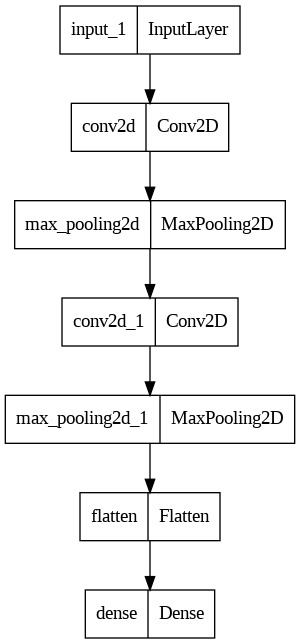

In [ ]:
plot_model(model)

#Model Training

In [ ]:
# Train
history = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 38s 80ms/step - loss: 2.2913 - accuracy: 0.1294
Epoch 2/10
469/469 [==============================] - 42s 90ms/step - loss: 2.2303 - accuracy: 0.2753
Epoch 3/10
469/469 [==============================] - 43s 92ms/step - loss: 2.1295 - accuracy: 0.4584
Epoch 4/10
469/469 [==============================] - 40s 85ms/step - loss: 1.9037 - accuracy: 0.6332
Epoch 5/10
469/469 [==============================] - 38s 80ms/step - loss: 1.4404 - accuracy: 0.7329
Epoch 6/10
469/469 [==============================] - 45s 96ms/step - loss: 0.9538 - accuracy: 0.7920
Epoch 7/10
469/469 [==============================] - 37s 79ms/step - loss: 0.6903 - accuracy: 0.8283
Epoch 8/10
469/469 [==============================] - 38s 80ms/step - loss: 0.5622 - accuracy: 0.8522
Epoch 9/10
469/469 [==============================] - 39s 84ms/step - loss: 0.4910 - accuracy: 0.8658
Epoch 10/10
469/469 [==============================] - 39s 84ms/step - loss: 0.445

#Inference on Test Data

In [ ]:
# Evaluate
evaluation = model.evaluate(X_test, Y_test)

# Display test statistics
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0]*100, evaluation[1]*100))

313/313 [==============================] - 4s 11ms/step - loss: 0.4082 - accuracy: 0.8864
Summary: Loss over the test dataset: 40.82, Accuracy: 88.64


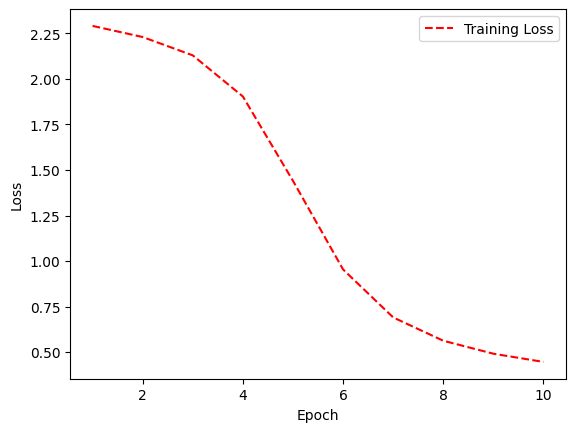

In [ ]:
# Get training loss histories
training_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

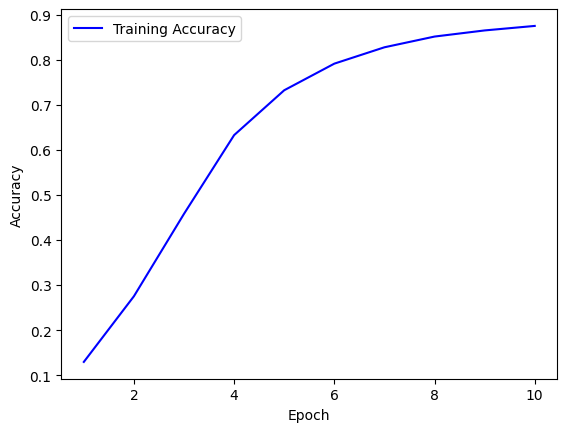

In [ ]:
# Get training accuracy histories
training_accuracy = history.history['accuracy']
# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)
# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'b-')
plt.legend(['Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();